<a href="https://colab.research.google.com/github/recpires/ml.recomendacao-img/blob/main/ml_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sistema de Recomendação

- Importando Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Instalando Tensorflow e mais algumas dependencias

In [11]:
!pip install tensorflow
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

- Modificando Modelo

In [12]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

- Adicionando GlobalMaxPooling:

In [13]:
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_1               │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

- Carregar bibliotecas e módulos suplementares

In [14]:
import cv2
import numpy as np

- Função de Extração de Características

In [15]:
def extract_feature(img_path, model):
  img=cv2.imread(img_path)
  img=cv2.resize(img,(224,224))
  img=np.array(img)
  expand_img=np.expand_dims(img,axis=0)
  pre_img=preprocess_input(expand_img)
  result=model.predict(pre_img).flatten()
  normalized_result=result/np.linalg.norm(result)
  return normalized_result

- Extraindo Características

In [16]:
import os

filename_carro=[]
feature_list_carro=[]
for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/carro'):
  try:
    filename_carro.append(os.path.join('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/carro',file))
    feature_list_carro.append(extract_feature(os.path.join('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/carro',file),model))
  except:
    pass

filename_moto=[]
feature_list_moto=[]
for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/moto'):
  try:
    filename_moto.append(os.path.join('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/moto',file))
    feature_list_moto.append(extract_feature(os.path.join('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/moto',file),model))
  except:
    pass

filename_bicicleta=[]
feature_list_bicicleta=[]
for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/bicicleta'):
  try:
    filename_bicicleta.append(os.path.join('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/bicicleta',file))
    feature_list_bicicleta.append(extract_feature(os.path.join('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/bicicleta',file),model))
  except:
    pass

filename_relogioPulso=[]
feature_list_relogioPulso=[]
for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/relogio'):
  try:
    filename_relogioPulso.append(os.path.join('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/relogio',file))
    feature_list_relogioPulso.append(extract_feature(os.path.join('/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/relogio',file),model))
  except:
    pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

- Usando NearestNeighbors

In [17]:
from sklearn.neighbors import NearestNeighbors

neighbors_carro=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_carro.fit(feature_list_carro)


distance_carro, indices_carro = neighbors_carro.kneighbors([extract_feature("/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/carro/007.jpeg", model)])


neighbors_moto=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_moto.fit(feature_list_moto)


distance_moto, indices_moto = neighbors_moto.kneighbors([extract_feature("/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/moto/007.jpeg", model)])


neighbors_bicicleta=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_bicicleta.fit(feature_list_bicicleta)


distance_bicicleta, indices_bicicleta = neighbors_bicicleta.kneighbors([extract_feature("/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/bicicleta/007.jpeg", model)])


neighbors_relogioPulso=NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors_relogioPulso.fit(feature_list_relogioPulso)


distance_relogioPulso, indices_relogioPulso = neighbors_relogioPulso.kneighbors([extract_feature("/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/relogio/14.jpeg", model)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


- Exibindo Imagens Semelhantes

------------------------------------ ORIGINAL IMAGE ------------------------------------



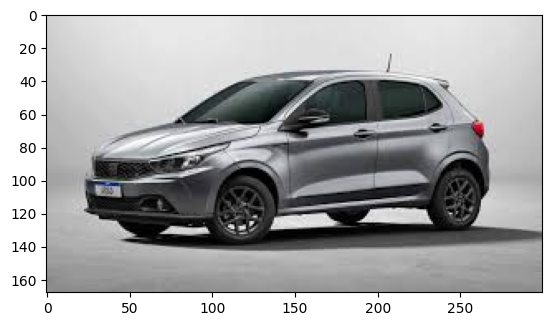

------------------------------------ RECOMMENDED IMAGES ------------------------------------



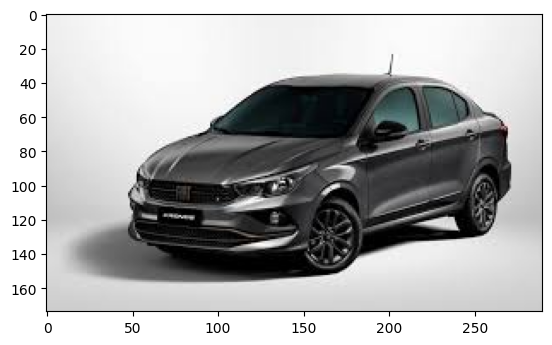

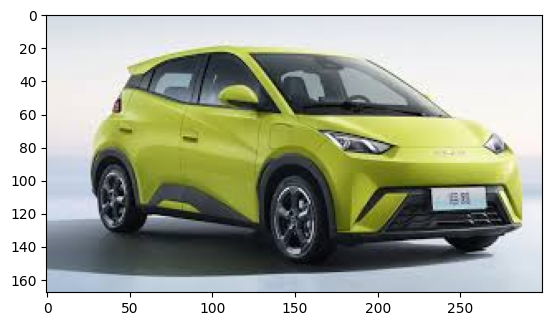

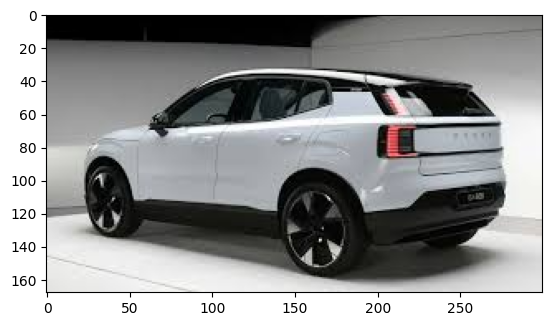

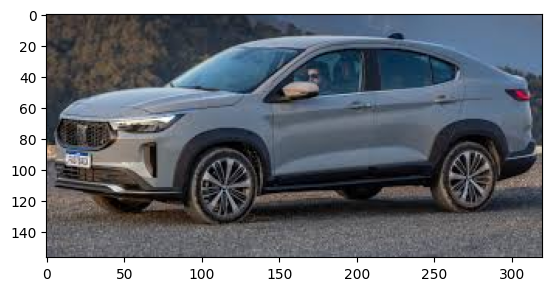

------------------------------------ ORIGINAL IMAGE ------------------------------------



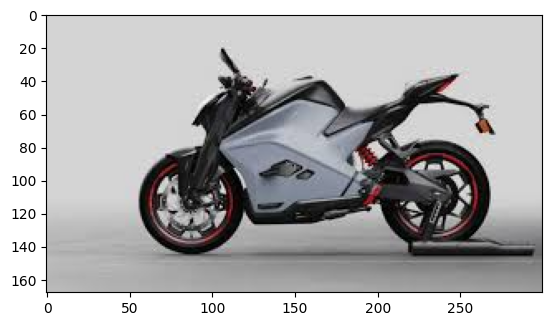

------------------------------------ RECOMMENDED IMAGES ------------------------------------



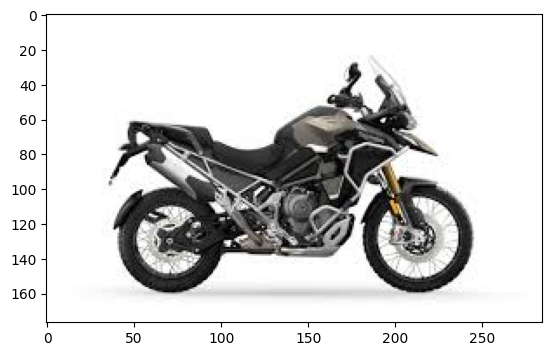

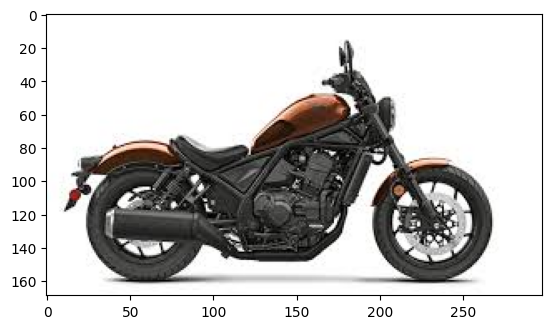

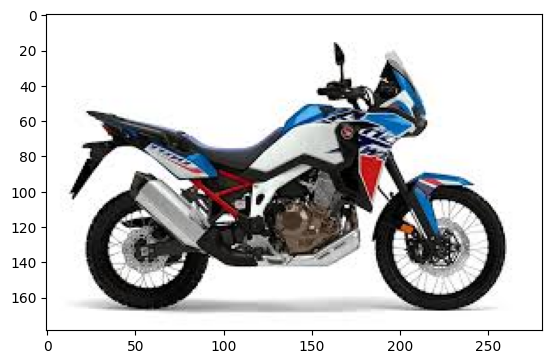

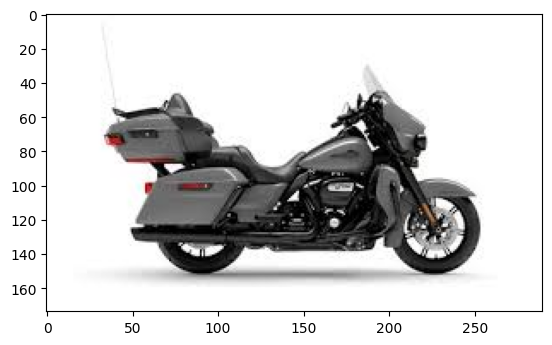

------------------------------------ ORIGINAL IMAGE ------------------------------------



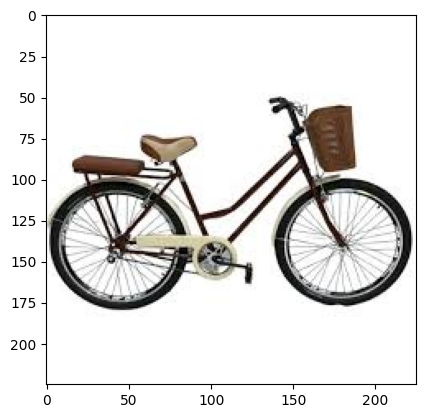

------------------------------------ RECOMMENDED IMAGES ------------------------------------



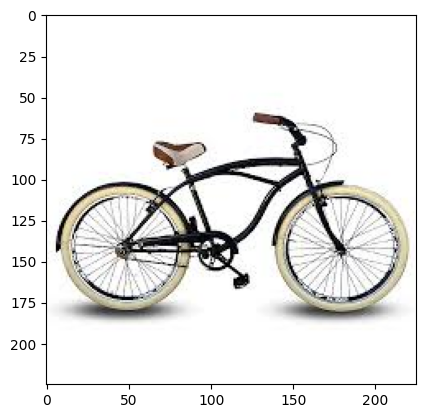

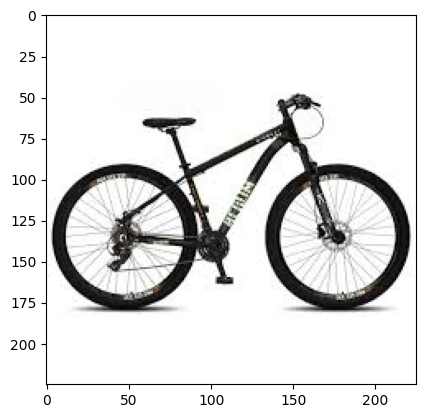

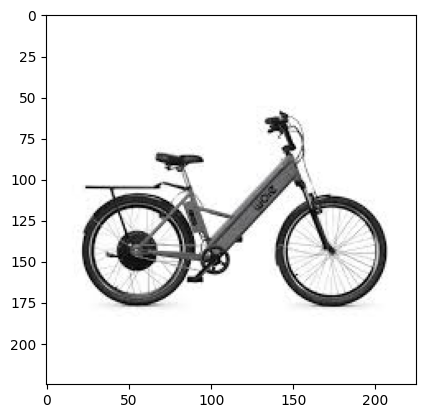

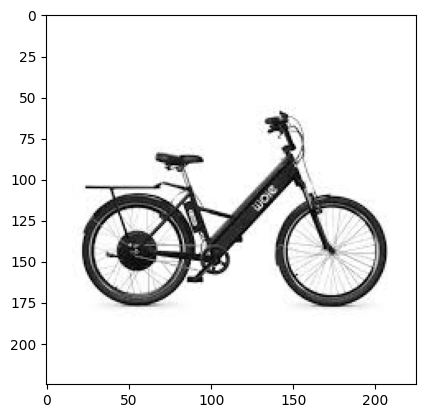

------------------------------------ ORIGINAL IMAGE ------------------------------------



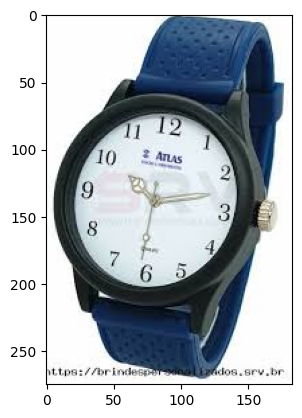

------------------------------------ RECOMMENDED IMAGES ------------------------------------



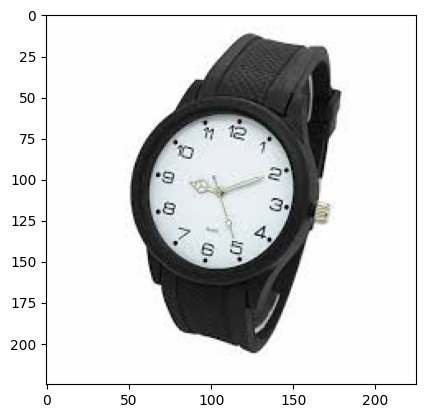

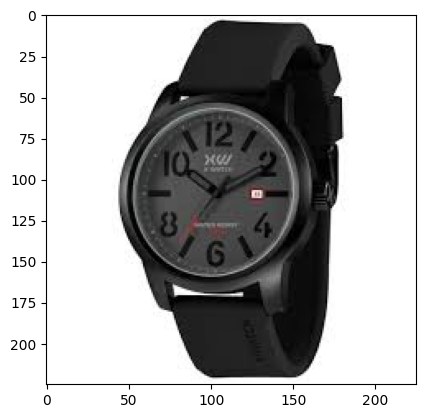

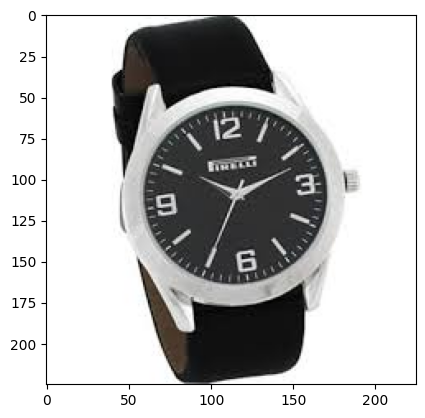

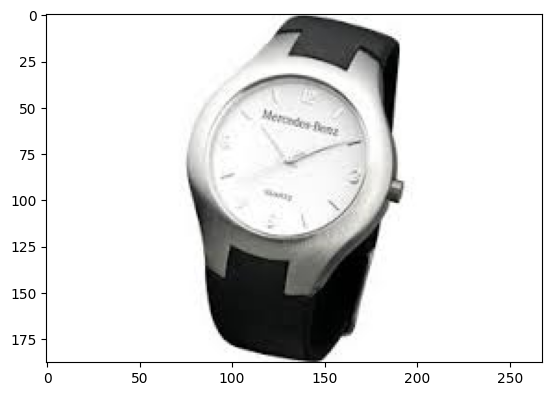

In [18]:
# Carro Recommendations
import matplotlib.pyplot as plt


print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")


plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/carro/007.jpeg"))
plt.show()


print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")


for file_carro in indices_carro[0][1:5]:
  plt.imshow(plt.imread(filename_carro[file_carro]))
  plt.show()

# Moto Recommendations


print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")


plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/moto/007.jpeg"))
plt.show()


print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")
for file_moto in indices_moto[0][1:5]:
  plt.imshow(plt.imread(filename_moto[file_moto]))
  plt.show()

# Bicicleta Recommendations


print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")


plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/bicicleta/007.jpeg"))
plt.show()


print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")
for file_bicicleta in indices_bicicleta[0][1:5]:
  plt.imshow(plt.imread(filename_bicicleta[file_bicicleta]))
  plt.show()

# Relogio de Pulso Recommendations


print("------------------------------------ ORIGINAL IMAGE ------------------------------------\n")


plt.imshow(plt.imread("/content/drive/MyDrive/Colab Notebooks/dataset-recomendacao/relogio/14.jpeg"))
plt.show()


print("------------------------------------ RECOMMENDED IMAGES ------------------------------------\n")
for file_relogioPulso in indices_relogioPulso[0][1:5]:
  plt.imshow(plt.imread(filename_relogioPulso[file_relogioPulso]))
  plt.show()